In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET (1).csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
# convert fulldate to datetime and set as index
df.FullDate = pd.to_datetime(df.FullDate)
df.set_index( "FullDate" , inplace= True ) 
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0, 0.5, 'ElecPrice')

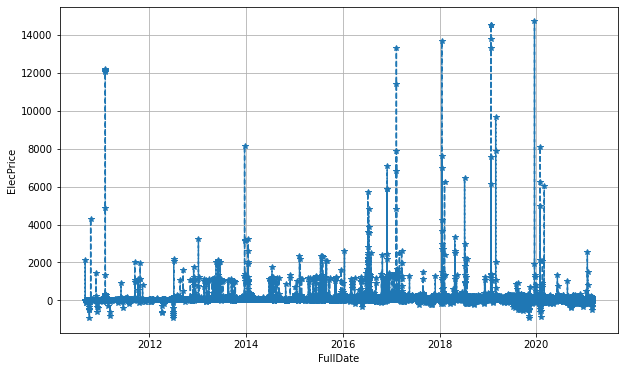

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [ ]:
data = df.drop(columns = ['Tmax', 'SysLoad', 'GasPrice'])
data.head()

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [ ]:

data  = data.resample('D').mean()
data

,ElecPrice
FullDate,
2010-09-01,114.654167
2010-09-02,23.783750
2010-09-03,21.040625
2010-09-04,20.928125
2010-09-05,20.856458
...,...
2021-02-24,26.448750
2021-02-25,24.063125
2021-02-26,60.228958


Text(0, 0.5, 'ElecPrice')

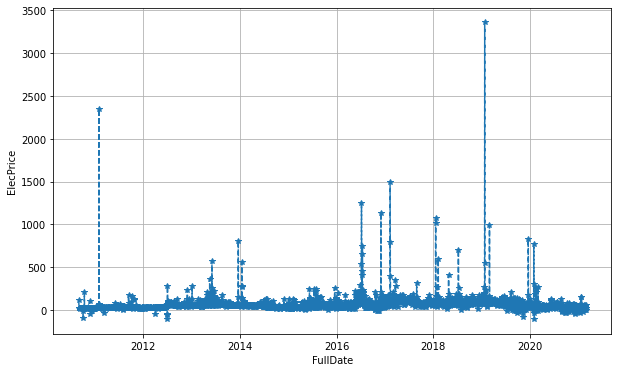

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(data.index, data.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [ ]:
data.shape

(3834, 1)

In [ ]:
df_MA = data.copy()
MA = df_MA[ 'ElecPrice' ].rolling( 12 ).mean() 

Text(0, 0.5, 'ElecPrice')

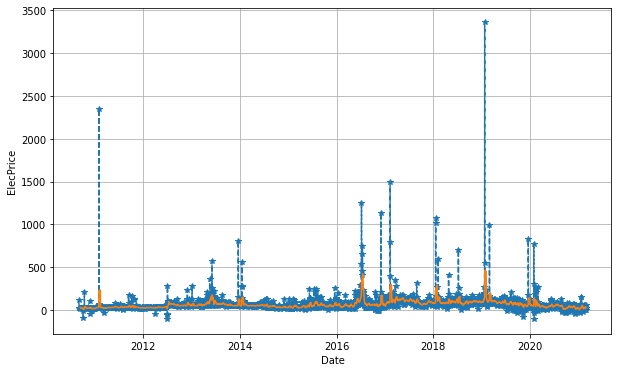

In [ ]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_MA.index, df_MA.ElecPrice, '--' , marker= '*' , )
plt.plot(MA.index, MA, '-')
plt.grid()
plt.xlabel( 'Date' )
plt.ylabel( 'ElecPrice' ) 

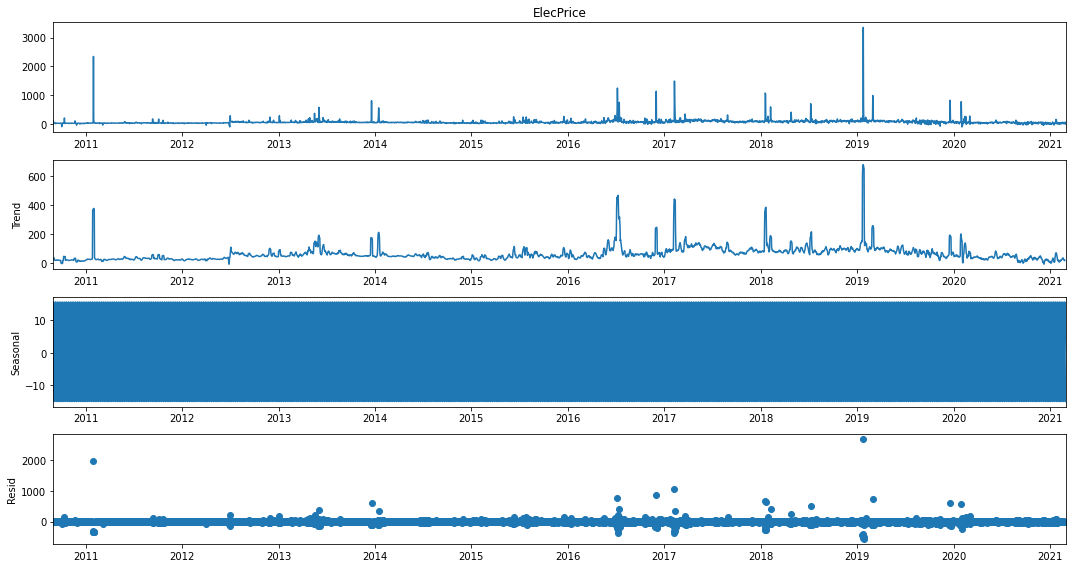

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(data[ 'ElecPrice' ], model= 'additive' )
decompose_series.plot()
plt.show()

The plot shows trend and seasonality which suggest that the data is non-stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df.ElecPrice)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -31.952975699557843 
p-value: 0.0 
No. of lags used: 53 
No. of observations used : 91962 
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


The P-value is greater than 5% citical value. This shows that the data is non-stationary

In [ ]:
df.SysLoad.head()

0    1688.215
1    1669.195
2    1491.980
3    1330.760
4    1247.940
Name: SysLoad, dtype: float64

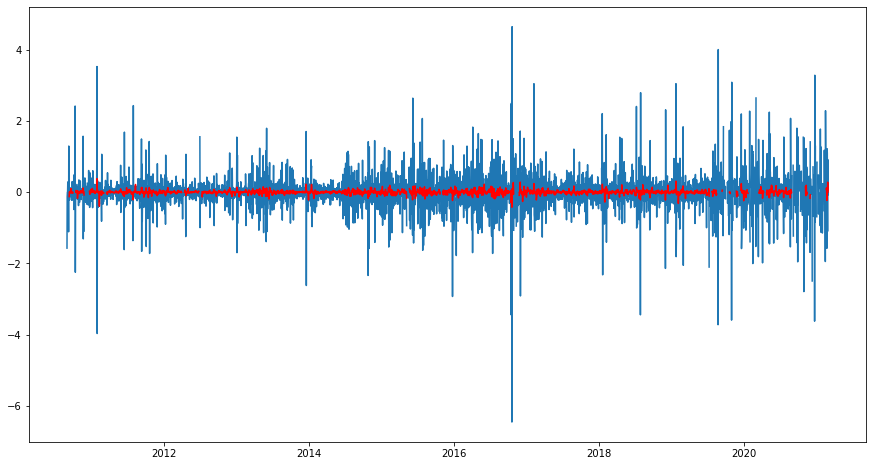

In [ ]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
data_log = np.log(data)
data_diff = data_log.diff(periods= 1 )
plt.plot(data_diff.index, data_diff.ElecPrice, '-' )
plt.plot(data_diff.rolling( 12 ).mean(), color= 'red' )

In [ ]:
data_diff.dropna(inplace =True)

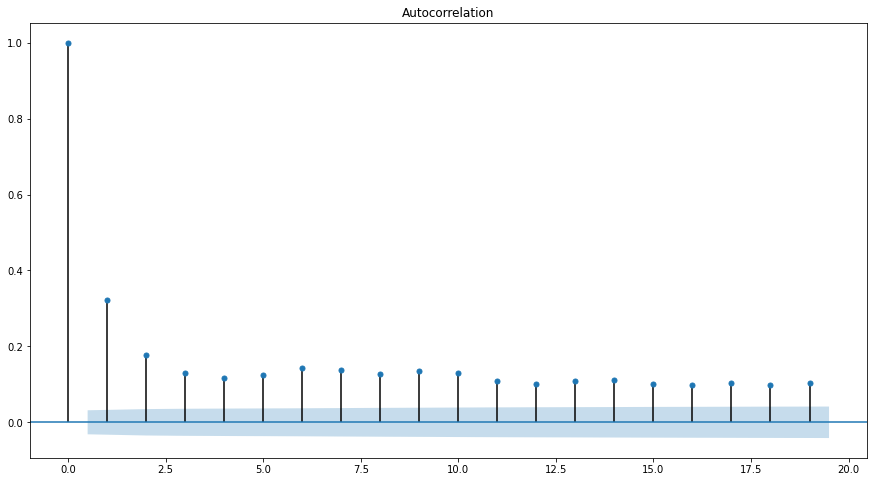

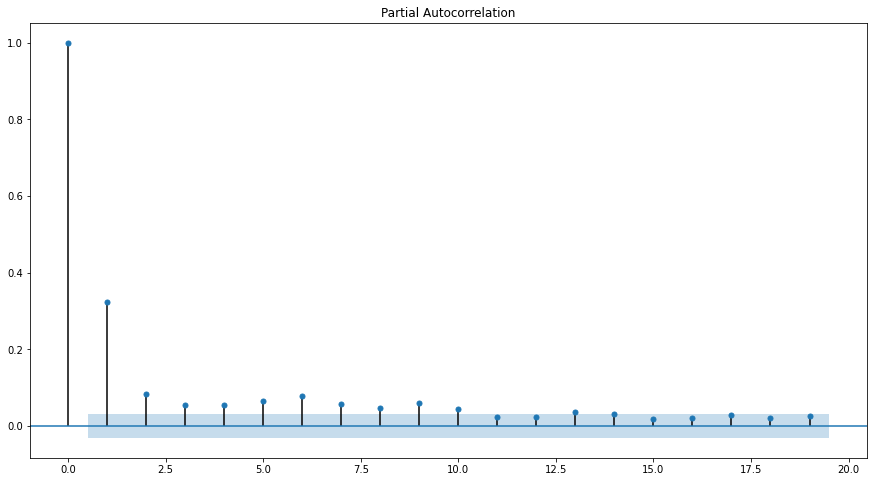

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(data, lags = range( 0 , 20 ))
plt.show()
#PACF
plot_pacf(data, lags = range( 0 , 20 ))
plt.show() 

In [ ]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['ElecPrice'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=45245.834, Time=6.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46992.745, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46347.966, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45424.608, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46990.746, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=45243.870, Time=3.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45260.093, Time=1.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=45243.535, Time=2.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=45243.842, Time=3.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=46069.521, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=45241.535, Time=0.92 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=45422.608, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=46345.967, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=45241.842, Time=1.38 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
# split to train and test set
print(data.shape)
train=data.iloc[:-1150]
test=data.iloc[-1150:]
print(train.shape,test.shape)

(3834, 1)
(2684, 1) (1150, 1)


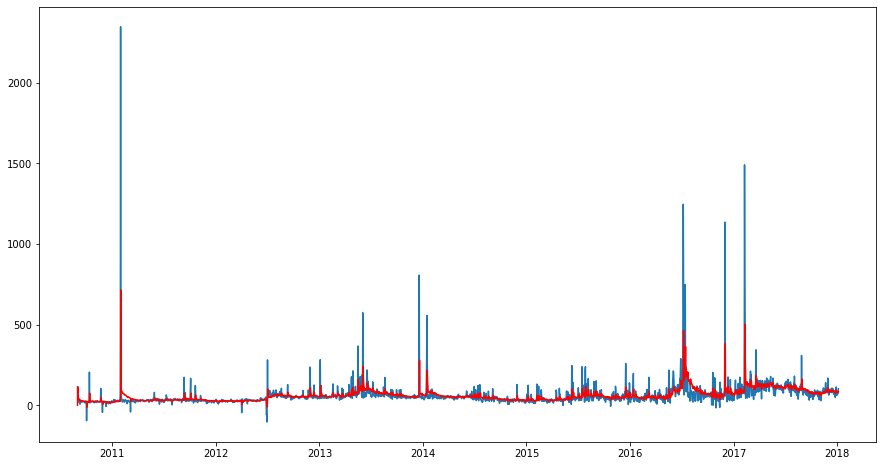

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
#(p,d,q)
AR_model = ARIMA(train['ElecPrice'], order=( 1, 1, 1 ))
AR_model_results = AR_model.fit()
plt.plot(train)
plt.plot(AR_model_results.fittedvalues, color= 'red' )

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=AR_model_results.predict(start=start,end=end, exog=None, dynamic=False).rename('ARIMA Predictions')
print(pred)
#pred.index = data.index[start:end+1]
#pred.head()

2018-01-06    89.267276
2018-01-07    85.782242
2018-01-08    84.872924
2018-01-09    84.635664
2018-01-10    84.573758
                ...    
2021-02-24    84.551903
2021-02-25    84.551903
2021-02-26    84.551903
2021-02-27    84.551903
2021-02-28    84.551903
Freq: D, Name: ARIMA Predictions, Length: 1150, dtype: float64


In [ ]:
end

3833

In [ ]:
start

2684

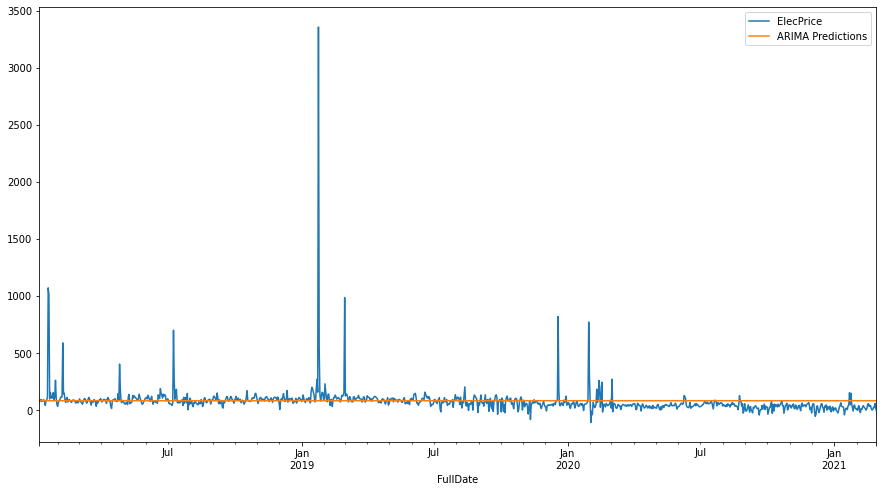

In [ ]:

test['ElecPrice'].plot(legend=True)
pred.plot(legend=True)

In [ ]:
# Check the RMSE to determine accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt
test['ElecPrice'].mean()
rmse=sqrt(mean_squared_error(pred,test['ElecPrice']))
print(rmse)

0.6343894980971896


In [ ]:
data_diff.ElecPrice.mean()

-0.0008915123774516403

We can say we have a good model so we will train again with the entire dataset and then make prediction for future dates.

In [ ]:
# Define the function to return the MAPE values
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 121 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638892 sha256=888521573cd6434e95a90a79263c8cfac384a07d86a9db4eb601949c0e8f42da
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time_series_analysis_and_forecast_DATASET.csv')
df['FullDate'] = pd.to_datetime(df.FullDate)
df_1 = df[['FullDate','ElecPrice']]
df_1 = df_1.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'})
df_1.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


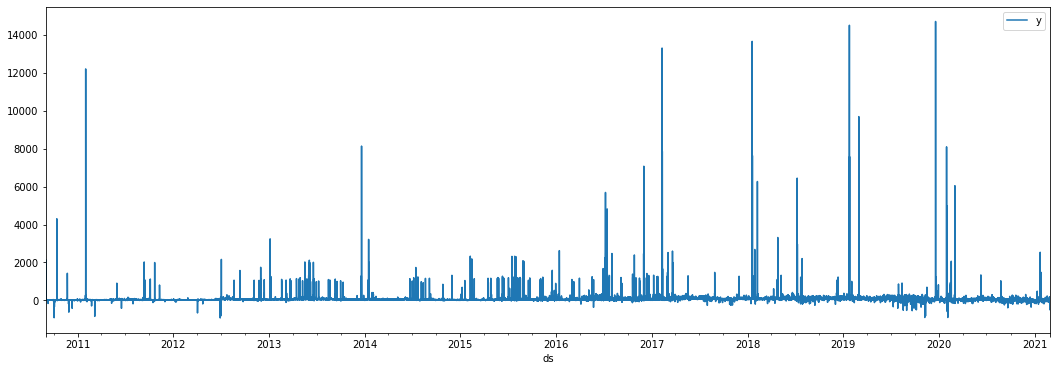

In [ ]:
df_1.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
df_1.shape

(92016, 2)

In [ ]:
ds_1 = df_1.set_index( "ds" , inplace= True ) 
df_1.head()

,y
ds,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [ ]:
df_1 = df_1.resample('D').mean()
df_1.reset_index(inplace =True)
df_1.shape

(3834, 2)

In [ ]:
df_1.head()

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458


In [ ]:
train = df_1.iloc[:2757]
test = df_1.iloc[2757:]
print(train.shape, test.shape)

(2757, 2) (1077, 2)


In [ ]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=1077)
forecast = model.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3829,2021-02-24,144.136828,31.369062,268.434599
3830,2021-02-25,146.921870,37.039559,267.197665
3831,2021-02-26,137.204411,23.322404,261.171087
3832,2021-02-27,122.897401,-4.793852,253.789747
3833,2021-02-28,119.227358,-3.528970,247.991144


In [ ]:
test.tail()

,ds,y
3829,2021-02-24,26.448750
3830,2021-02-25,24.063125
3831,2021-02-26,60.228958
3832,2021-02-27,20.374167
3833,2021-02-28,-4.124375


In [ ]:
plot_plotly(model ,forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
## Multivarant Analysis
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df = df.set_index( "FullDate"  ) 
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df = df.resample('D').mean()
df.reset_index(inplace = True)
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [ ]:
df.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace= True)
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [ ]:
train = df.iloc[:2757]
test = df.iloc[2757:]
print(train.shape, test.shape)

(2757, 5) (1077, 5)


In [ ]:
m_model = Prophet()
m_model.add_regressor('Tmax')
m_model.add_regressor('SysLoad')
m_model.add_regressor('GasPrice')
m_model.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=1077)
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3829,2021-02-24,147.867971,24.606886,260.472900,74.137765,216.577729,-3.731143,-3.731143,-3.731143,6.640747,6.640747,6.640747,-10.371890,-10.371890,-10.371890,0.0,0.0,0.0,144.136828
3830,2021-02-25,147.901439,30.939721,273.187776,74.107396,216.766146,-0.979570,-0.979570,-0.979570,10.713780,10.713780,10.713780,-11.693350,-11.693350,-11.693350,0.0,0.0,0.0,146.921870
3831,2021-02-26,147.934908,13.533100,258.465268,74.077028,216.954563,-10.730497,-10.730497,-10.730497,2.094989,2.094989,2.094989,-12.825486,-12.825486,-12.825486,0.0,0.0,0.0,137.204411
3832,2021-02-27,147.968376,-1.028632,245.561488,74.046660,217.142980,-25.070975,-25.070975,-25.070975,-11.310788,-11.310788,-11.310788,-13.760187,-13.760187,-13.760187,0.0,0.0,0.0,122.897401
3833,2021-02-28,148.001845,8.316544,251.275246,74.018967,217.278340,-28.774486,-28.774486,-28.774486,-14.281269,-14.281269,-14.281269,-14.493217,-14.493217,-14.493217,0.0,0.0,0.0,119.227358


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3829,2021-02-24,144.136828,24.606886,260.472900
3830,2021-02-25,146.921870,30.939721,273.187776
3831,2021-02-26,137.204411,13.533100,258.465268
3832,2021-02-27,122.897401,-1.028632,245.561488
3833,2021-02-28,119.227358,8.316544,251.275246


In [ ]:
test.tail()

,ds,Tmax,SysLoad,GasPrice,y
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167
3833,2021-02-28,24.3,278.127285,5.4848,-4.124375


In [ ]:
plot_plotly(m_model ,forecast)

In [ ]:
plot_components_plotly(m_model, forecast)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#test['y'].mean()
rmse=sqrt(mean_squared_error(fore['yhat'], test['y']))
print(rmse)

133.84386685269325


In [ ]:
forecast.shape

(3834, 19)

In [ ]:
test.shape

(1077, 5)

In [ ]:
fore = forecast.iloc[2757:]